# 22장 분할 정복

> 분할 정복은 다중 재귀를 기반으로 하는 알고리즘 디자인 패러다임을 말합니다.

분할 정복은  직접 해결할 수 있을 정도로 간단한 문제가 될 때까지 문제를 재귀적으로 쪼개나간 다음, 그 하위 문제의 결과들을 조합하여 원래 문제의 결과로 만들어 냅니다.

대표적인 분할 정복 알고리즘은 병합 정렬을 들 수 있는데, 병합 정렬 과정을 표현한 아래 그림은 분할 정복의 원리를 잘 보여줍니다.

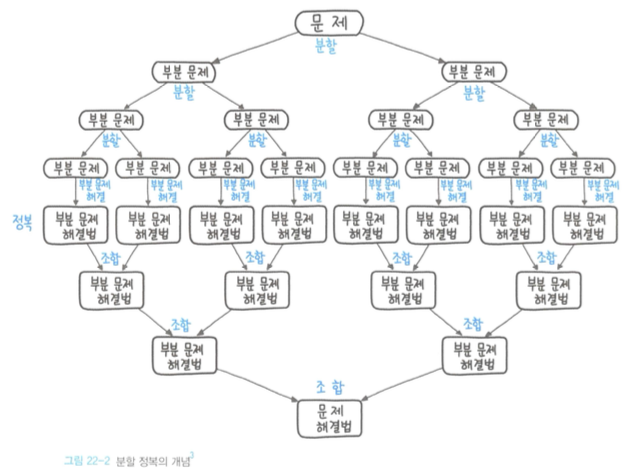

### 83. 과반수 앨리먼트

과반수를 차지하는 (절반을 초과하는) 엘리먼트를 출력하라!

- input1 = [3, 2, 3]
- output1 = 3

- input2 = [2, 2, 1, 1, 1, 2, 2]
- output2 = 2

### 풀이 1. 브루트 포스로 과반수 비교

In [1]:
def majorityElement1(self, nums):
    for num in nums:
        if nums.count(num) > len(nums) // 2:
            return num

In [2]:
nums = [3, 2, 3]

In [3]:
majorityElement1(None, nums)

3

### 풀이 2. 다이나믹 프로그래밍

In [4]:
import collections

def majorityElement2(self, nums):
    counts = collections.defaultdict(int)
    for num in nums:
        if counts[num] == 0:
            counts[num] = nums.count(num)

        if counts[num] > len(nums) // 2:
            return num

In [5]:
majorityElement2(None, nums)

3

### 풀이 3. 분할 정복

In [6]:
def majorityElement(nums):
    if not nums:
        return None
    if len(nums) == 1:
        return nums[0]

    half = len(nums) // 2
    a = majorityElement(nums[:half])
    b = majorityElement(nums[half:])

    return [b, a][nums.count(a) > half]

In [7]:
majorityElement(nums)

3

위의 코드는 어떻게 돌려야할 지 말 모르겠음..

### 풀이 4. 파이썬다운 방식

In [8]:
def majorityElement4(self, nums):
    return sorted(nums)[len(nums) // 2]

In [9]:
majorityElement4(None, nums)

3

### 84. 괄호를 삽입하는 여러 가지 방법

숫자와 연산자를 입력받아 가능한 모든 조합의 결과를 출력하라.

예제 1
- input1 = "2-1-1"
- output1 = [0, 2]

- 설명
  ((2-1)-1) = 0
  (2-(1-1)) = 2

예제 2
- input2 = "2*3-4*5"
- output2 = [-34, -14, -10, -10, 10]

- 설명
  
  

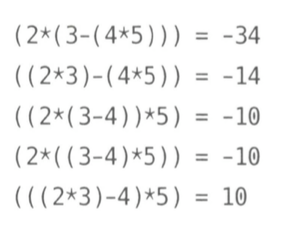

### 풀이 1. 분할 정복을 이용한 다양한 조합

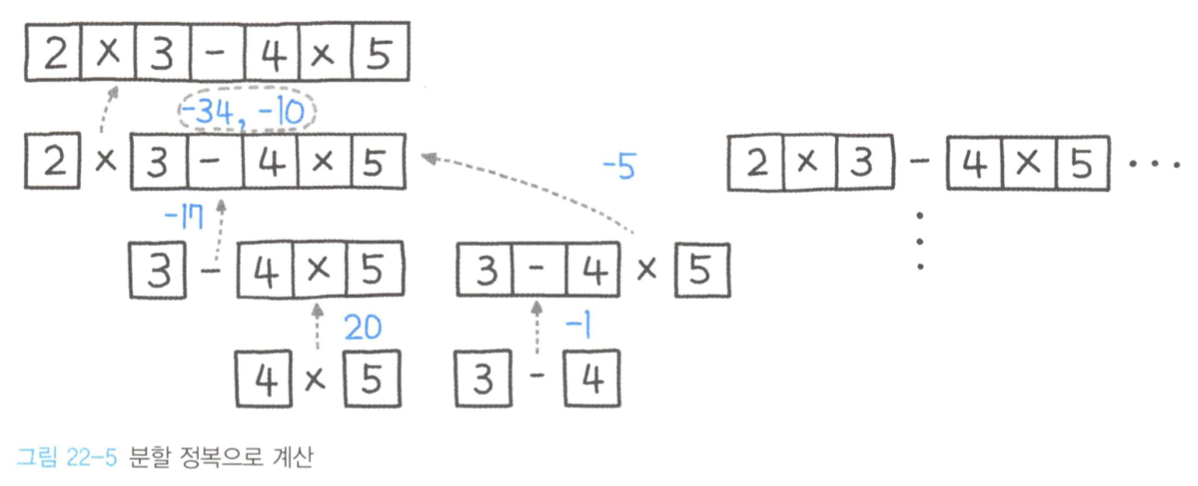

*, -, + 연산자가 등장할 때 좌/우 분할을 하고 각각 계산 결과를 리턴해줍니다.

위 그림을 보면 3-4*5는 -17과 -5 복수 개의 계산 결과를 갖게 되며, 최종적으로 2 * [-17, -5] 계산 결과인 [-34, -10]을 리턴하게 된다.

위 그림에서는 생략되었지만, 우측으로는 각각 다른 계산 결과도 리턴받게 되며, 최종적으로 [-3, -14, -10, -10, 10] 이렇게 5개 결과를 리턴하게 된다.

In [13]:
class Solution:
    def diffWaysToCompute(self, input):
        def compute(left, right, op):
            results = []
            for l in left:
                for r in right:
                    results.append(eval(str(l) + op + str(r)))
            return results

        if input.isdigit():
            return [int(input)]

        results = []
        for index, value in enumerate(input):
            if value in "-+*":
                left = self.diffWaysToCompute(input[:index])
                right = self.diffWaysToCompute(input[index + 1:])

                results.extend(compute(left, right, value))
        return results

In [14]:
input = "2-1-1"

In [15]:
solution = Solution()

In [16]:
solution.diffWaysToCompute(input)

[2, 0]